In [1]:
cd C:\Users\malkabir\OneDrive - University of New Mexico\All Personal Project\2020 M5 Forecasting Everything

C:\Users\malkabir\OneDrive - University of New Mexico\All Personal Project\2020 M5 Forecasting Everything


In [27]:
#standard
import pandas as pd, numpy as np
from numpy.random import randn

#stat

from scipy import stats

#plotting

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 01. Data Processing

## 01.01. Calender or event data

In [3]:
#read raw data
calendar=pd.read_csv("RawData/calendar.csv")
calendar.head(10)

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1
5,2011-02-03,11101,Thursday,6,2,2011,d_6,NaN,NaN,NaN,NaN,1,1,1
6,2011-02-04,11101,Friday,7,2,2011,d_7,NaN,NaN,NaN,NaN,1,0,0
7,2011-02-05,11102,Saturday,1,2,2011,d_8,NaN,NaN,NaN,NaN,1,1,1
8,2011-02-06,11102,Sunday,2,2,2011,d_9,SuperBowl,Sporting,NaN,NaN,1,1,1
9,2011-02-07,11102,Monday,3,2,2011,d_10,NaN,NaN,NaN,NaN,1,1,0


In [4]:
#rename d column to index
calendar=calendar.rename(columns={'d':'index'})

In [5]:
calendar.shape

(1969, 14)

## 01.02. Sales_train_validation data

In [6]:
#Read sales_train_validation raw data

sales_train_validation=pd.read_csv("RawData/sales_train_validation.csv")
sales_train_validation.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [7]:
sales_train_validation.shape

(30490, 1919)

## 01.03. Sell_ Prices data

In [8]:
#read Raw sell_prices data

sell_prices=pd.read_csv("RawData/sell_prices.csv")
sell_prices.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


In [9]:
sell_prices.shape

(6841121, 4)

## Let merge and prepare a timeseries data

In [10]:
#concatenate item_id and store_id of sell_prices to match with validation table column name 

sell_prices['SELL_PRICES_ID'] = sell_prices['item_id'].str.cat(sell_prices['store_id'],sep="_")
sell_prices.head()

,store_id,item_id,wm_yr_wk,sell_price,SELL_PRICES_ID
0,CA_1,HOBBIES_1_001,11325,9.58,HOBBIES_1_001_CA_1
1,CA_1,HOBBIES_1_001,11326,9.58,HOBBIES_1_001_CA_1
2,CA_1,HOBBIES_1_001,11327,8.26,HOBBIES_1_001_CA_1
3,CA_1,HOBBIES_1_001,11328,8.26,HOBBIES_1_001_CA_1
4,CA_1,HOBBIES_1_001,11329,8.26,HOBBIES_1_001_CA_1


In [11]:
sell_prices.shape

(6841121, 5)

In [12]:
#make the data long to wide, in other word pivot
sell_prices=sell_prices.pivot(index='wm_yr_wk', columns='SELL_PRICES_ID', values='sell_price').reset_index()
sell_prices.head()

SELL_PRICES_ID,wm_yr_wk,FOODS_1_001_CA_1,FOODS_1_001_CA_2,FOODS_1_001_CA_3,FOODS_1_001_CA_4,FOODS_1_001_TX_1,FOODS_1_001_TX_2,FOODS_1_001_TX_3,FOODS_1_001_WI_1,FOODS_1_001_WI_2,...,HOUSEHOLD_2_516_CA_1,HOUSEHOLD_2_516_CA_2,HOUSEHOLD_2_516_CA_3,HOUSEHOLD_2_516_CA_4,HOUSEHOLD_2_516_TX_1,HOUSEHOLD_2_516_TX_2,HOUSEHOLD_2_516_TX_3,HOUSEHOLD_2_516_WI_1,HOUSEHOLD_2_516_WI_2,HOUSEHOLD_2_516_WI_3
0,11101,2.0,2.0,2.0,2.0,2.0,2.0,NaN,2.0,2.0,...,5.94,NaN,5.94,NaN,NaN,5.94,5.94,5.94,NaN,5.94
1,11102,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,5.94,5.94,5.94,NaN,NaN,5.94,5.94,5.94,NaN,5.94
2,11103,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,5.94,5.94,5.94,5.94,5.94,5.94,5.94,5.94,NaN,5.94
3,11104,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,5.94,5.94,5.94,5.94,5.94,5.94,5.94,5.94,NaN,5.94
4,11105,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,5.94,5.94,5.94,5.94,5.94,5.94,5.94,5.94,NaN,5.94


In [13]:
sell_prices.shape

(282, 30491)

In [14]:
#take a copy of raw sales_train_validation

stv=sales_train_validation.copy()

In [15]:
stv=stv.drop(['item_id','dept_id','cat_id','store_id','state_id'],axis=1)
stv.head()

,id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,0,0,0,0,0,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,0,0,0,0,0,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,0,0,0,0,0,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,0,0,0,0,0,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [16]:
#transpose the day column to row and items (i.e.HOBBIES_1_001_CA_1_validation) to columns to make a timeseries looks data

stv_T=stv.T
stv_T.columns = stv_T.iloc[0]
stv_T = stv_T[1:]
stv_T.head()

id,HOBBIES_1_001_CA_1_validation,HOBBIES_1_002_CA_1_validation,HOBBIES_1_003_CA_1_validation,HOBBIES_1_004_CA_1_validation,HOBBIES_1_005_CA_1_validation,HOBBIES_1_006_CA_1_validation,HOBBIES_1_007_CA_1_validation,HOBBIES_1_008_CA_1_validation,HOBBIES_1_009_CA_1_validation,HOBBIES_1_010_CA_1_validation,...,FOODS_3_818_WI_3_validation,FOODS_3_819_WI_3_validation,FOODS_3_820_WI_3_validation,FOODS_3_821_WI_3_validation,FOODS_3_822_WI_3_validation,FOODS_3_823_WI_3_validation,FOODS_3_824_WI_3_validation,FOODS_3_825_WI_3_validation,FOODS_3_826_WI_3_validation,FOODS_3_827_WI_3_validation
d_1,0,0,0,0,0,0,0,12,2,0,...,0,14,1,0,4,0,0,0,0,0
d_2,0,0,0,0,0,0,0,15,0,0,...,0,11,1,0,4,0,0,6,0,0
d_3,0,0,0,0,0,0,0,0,7,1,...,0,5,1,0,2,2,0,0,0,0
d_4,0,0,0,0,0,0,0,0,3,0,...,0,6,1,0,5,2,0,2,0,0
d_5,0,0,0,0,0,0,0,0,0,0,...,0,5,1,0,2,0,0,2,0,0


In [17]:
stv_T.shape

(1913, 30490)

In [18]:
#reset the index to add as a column

stv_T.reset_index(inplace=True)
stv_T.head()

id,index,HOBBIES_1_001_CA_1_validation,HOBBIES_1_002_CA_1_validation,HOBBIES_1_003_CA_1_validation,HOBBIES_1_004_CA_1_validation,HOBBIES_1_005_CA_1_validation,HOBBIES_1_006_CA_1_validation,HOBBIES_1_007_CA_1_validation,HOBBIES_1_008_CA_1_validation,HOBBIES_1_009_CA_1_validation,...,FOODS_3_818_WI_3_validation,FOODS_3_819_WI_3_validation,FOODS_3_820_WI_3_validation,FOODS_3_821_WI_3_validation,FOODS_3_822_WI_3_validation,FOODS_3_823_WI_3_validation,FOODS_3_824_WI_3_validation,FOODS_3_825_WI_3_validation,FOODS_3_826_WI_3_validation,FOODS_3_827_WI_3_validation
0,d_1,0,0,0,0,0,0,0,12,2,...,0,14,1,0,4,0,0,0,0,0
1,d_2,0,0,0,0,0,0,0,15,0,...,0,11,1,0,4,0,0,6,0,0
2,d_3,0,0,0,0,0,0,0,0,7,...,0,5,1,0,2,2,0,0,0,0
3,d_4,0,0,0,0,0,0,0,0,3,...,0,6,1,0,5,2,0,2,0,0
4,d_5,0,0,0,0,0,0,0,0,0,...,0,5,1,0,2,0,0,2,0,0


In [19]:
calendar.head(2)

,date,wm_yr_wk,weekday,wday,month,year,index,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0


In [20]:
#Merge with sales_train_validation with calender data

stv_T_merge=pd.merge(stv_T,calendar,on=['index'],how='left')
stv_T_merge.head()

,index,HOBBIES_1_001_CA_1_validation,HOBBIES_1_002_CA_1_validation,HOBBIES_1_003_CA_1_validation,HOBBIES_1_004_CA_1_validation,HOBBIES_1_005_CA_1_validation,HOBBIES_1_006_CA_1_validation,HOBBIES_1_007_CA_1_validation,HOBBIES_1_008_CA_1_validation,HOBBIES_1_009_CA_1_validation,...,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,d_1,0,0,0,0,0,0,0,12,2,...,1,1,2011,NaN,NaN,NaN,NaN,0,0,0
1,d_2,0,0,0,0,0,0,0,15,0,...,2,1,2011,NaN,NaN,NaN,NaN,0,0,0
2,d_3,0,0,0,0,0,0,0,0,7,...,3,1,2011,NaN,NaN,NaN,NaN,0,0,0
3,d_4,0,0,0,0,0,0,0,0,3,...,4,2,2011,NaN,NaN,NaN,NaN,1,1,0
4,d_5,0,0,0,0,0,0,0,0,0,...,5,2,2011,NaN,NaN,NaN,NaN,1,0,1


In [21]:
stv_T_merge.shape

(1913, 30504)

In [22]:
sell_prices.head(2)

SELL_PRICES_ID,wm_yr_wk,FOODS_1_001_CA_1,FOODS_1_001_CA_2,FOODS_1_001_CA_3,FOODS_1_001_CA_4,FOODS_1_001_TX_1,FOODS_1_001_TX_2,FOODS_1_001_TX_3,FOODS_1_001_WI_1,FOODS_1_001_WI_2,...,HOUSEHOLD_2_516_CA_1,HOUSEHOLD_2_516_CA_2,HOUSEHOLD_2_516_CA_3,HOUSEHOLD_2_516_CA_4,HOUSEHOLD_2_516_TX_1,HOUSEHOLD_2_516_TX_2,HOUSEHOLD_2_516_TX_3,HOUSEHOLD_2_516_WI_1,HOUSEHOLD_2_516_WI_2,HOUSEHOLD_2_516_WI_3
0,11101,2.0,2.0,2.0,2.0,2.0,2.0,NaN,2.0,2.0,...,5.94,NaN,5.94,NaN,NaN,5.94,5.94,5.94,NaN,5.94
1,11102,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,5.94,5.94,5.94,NaN,NaN,5.94,5.94,5.94,NaN,5.94


In [23]:
# Merge sales_train_validation and calender's merge data with sell_prices data

stv_T_merge_all=pd.merge(stv_T_merge,sell_prices,on=['wm_yr_wk'],how='left')
stv_T_merge_all.head()

,index,HOBBIES_1_001_CA_1_validation,HOBBIES_1_002_CA_1_validation,HOBBIES_1_003_CA_1_validation,HOBBIES_1_004_CA_1_validation,HOBBIES_1_005_CA_1_validation,HOBBIES_1_006_CA_1_validation,HOBBIES_1_007_CA_1_validation,HOBBIES_1_008_CA_1_validation,HOBBIES_1_009_CA_1_validation,...,HOUSEHOLD_2_516_CA_1,HOUSEHOLD_2_516_CA_2,HOUSEHOLD_2_516_CA_3,HOUSEHOLD_2_516_CA_4,HOUSEHOLD_2_516_TX_1,HOUSEHOLD_2_516_TX_2,HOUSEHOLD_2_516_TX_3,HOUSEHOLD_2_516_WI_1,HOUSEHOLD_2_516_WI_2,HOUSEHOLD_2_516_WI_3
0,d_1,0,0,0,0,0,0,0,12,2,...,5.94,NaN,5.94,NaN,NaN,5.94,5.94,5.94,NaN,5.94
1,d_2,0,0,0,0,0,0,0,15,0,...,5.94,NaN,5.94,NaN,NaN,5.94,5.94,5.94,NaN,5.94
2,d_3,0,0,0,0,0,0,0,0,7,...,5.94,NaN,5.94,NaN,NaN,5.94,5.94,5.94,NaN,5.94
3,d_4,0,0,0,0,0,0,0,0,3,...,5.94,NaN,5.94,NaN,NaN,5.94,5.94,5.94,NaN,5.94
4,d_5,0,0,0,0,0,0,0,0,0,...,5.94,NaN,5.94,NaN,NaN,5.94,5.94,5.94,NaN,5.94


In [24]:
# sort the column name

stv_T_merge_all=stv_T_merge_all.sort_index(axis=1,ascending=False)
stv_T_merge_all.head()

,year,wm_yr_wk,weekday,wday,snap_WI,snap_TX,snap_CA,month,index,event_type_2,...,FOODS_1_001_TX_1_validation,FOODS_1_001_TX_1,FOODS_1_001_CA_4_validation,FOODS_1_001_CA_4,FOODS_1_001_CA_3_validation,FOODS_1_001_CA_3,FOODS_1_001_CA_2_validation,FOODS_1_001_CA_2,FOODS_1_001_CA_1_validation,FOODS_1_001_CA_1
0,2011,11101,Saturday,1,0,0,0,1,d_1,NaN,...,0,2.0,0,2.0,1,2.0,2,2.0,3,2.0
1,2011,11101,Sunday,2,0,0,0,1,d_2,NaN,...,1,2.0,1,2.0,2,2.0,0,2.0,0,2.0
2,2011,11101,Monday,3,0,0,0,1,d_3,NaN,...,1,2.0,1,2.0,1,2.0,0,2.0,0,2.0
3,2011,11101,Tuesday,4,0,1,1,2,d_4,NaN,...,0,2.0,1,2.0,1,2.0,0,2.0,1,2.0
4,2011,11101,Wednesday,5,1,0,1,2,d_5,NaN,...,0,2.0,1,2.0,1,2.0,1,2.0,4,2.0


In [25]:
stv_T_merge_all.shape

(1913, 60994)

In [44]:
#pick your desired columns for analysis

stv_T_merge_all[['index','year','wm_yr_wk','snap_WI','snap_TX','snap_CA','FOODS_1_001_TX_1_validation','FOODS_1_001_TX_1']].head()

,index,year,wm_yr_wk,snap_WI,snap_TX,snap_CA,FOODS_1_001_TX_1_validation,FOODS_1_001_TX_1
0,d_1,2011,11101,0,0,0,0,2.0
1,d_2,2011,11101,0,0,0,1,2.0
2,d_3,2011,11101,0,0,0,1,2.0
3,d_4,2011,11101,0,1,1,0,2.0
4,d_5,2011,11101,1,0,1,0,2.0


In [28]:
df=stv_T_merge_all.copy()

# 02. Exploratory Data Analysis

In [53]:
df1=df.copy()
df1.head()

,year,wm_yr_wk,weekday,wday,snap_WI,snap_TX,snap_CA,month,index,event_type_2,...,FOODS_1_001_TX_1_validation,FOODS_1_001_TX_1,FOODS_1_001_CA_4_validation,FOODS_1_001_CA_4,FOODS_1_001_CA_3_validation,FOODS_1_001_CA_3,FOODS_1_001_CA_2_validation,FOODS_1_001_CA_2,FOODS_1_001_CA_1_validation,FOODS_1_001_CA_1
0,2011,11101,Saturday,1,0,0,0,1,d_1,NaN,...,0,2.0,0,2.0,1,2.0,2,2.0,3,2.0
1,2011,11101,Sunday,2,0,0,0,1,d_2,NaN,...,1,2.0,1,2.0,2,2.0,0,2.0,0,2.0
2,2011,11101,Monday,3,0,0,0,1,d_3,NaN,...,1,2.0,1,2.0,1,2.0,0,2.0,0,2.0
3,2011,11101,Tuesday,4,0,1,1,2,d_4,NaN,...,0,2.0,1,2.0,1,2.0,0,2.0,1,2.0
4,2011,11101,Wednesday,5,1,0,1,2,d_5,NaN,...,0,2.0,1,2.0,1,2.0,1,2.0,4,2.0


## 02.01. Sell price change of items in diff state : FOODS_1_001_WI_1

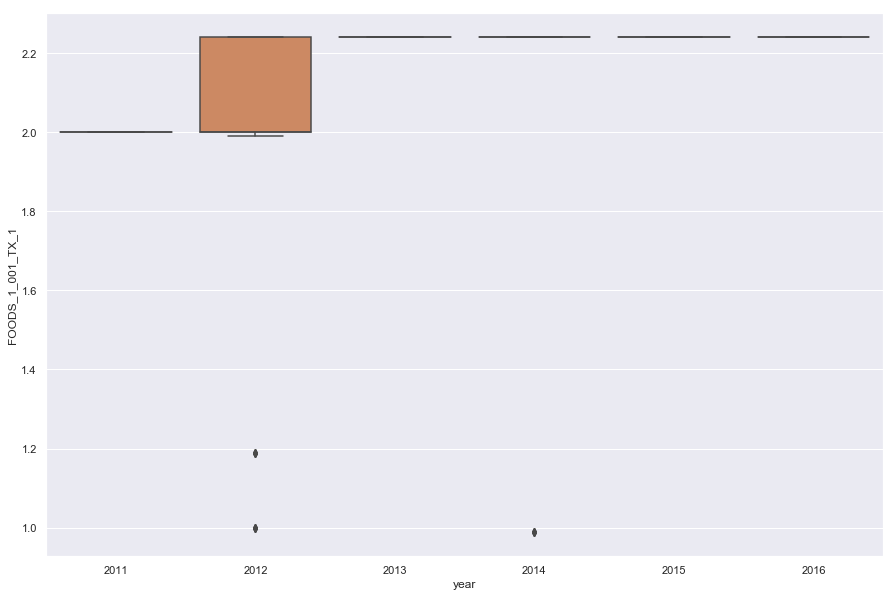

In [54]:
plt.figure(figsize=(15,10))
sns.set(font_scale = 1)
ax = sns.boxplot(x="year", y="FOODS_1_001_TX_1", data=df1)

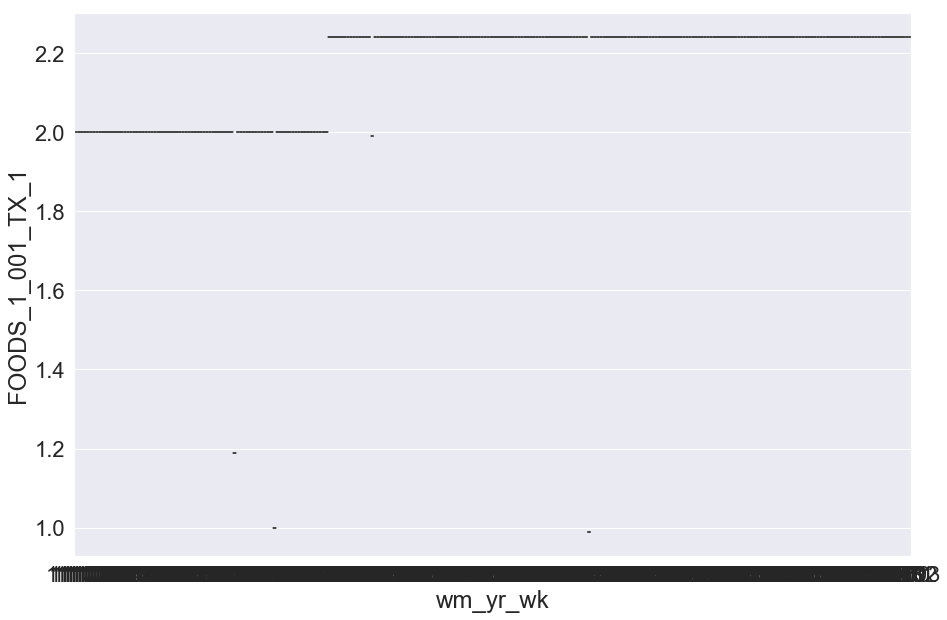

In [55]:
plt.figure(figsize=(15,10))
sns.set(font_scale = 2)
ax = sns.boxplot(x="wm_yr_wk", y="FOODS_1_001_TX_1", data=df1)

In [56]:
#remove outlier from price 
df1_r = df1[df1['FOODS_1_001_TX_1'].between(1.5, 2.5, inclusive=True)]

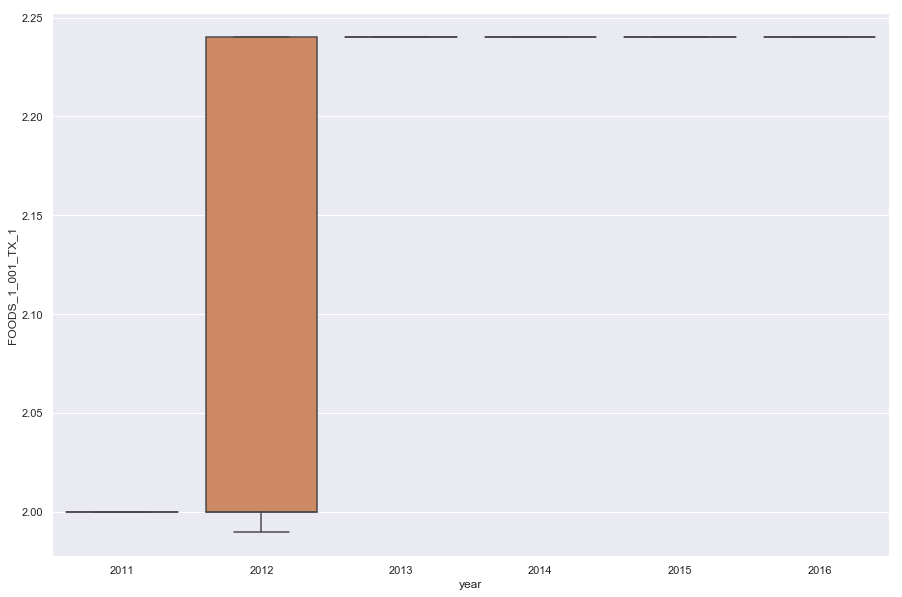

In [57]:
plt.figure(figsize=(15,10))
sns.set(font_scale = 1)
ax = sns.boxplot(x="year", y="FOODS_1_001_TX_1", data=df1_r)

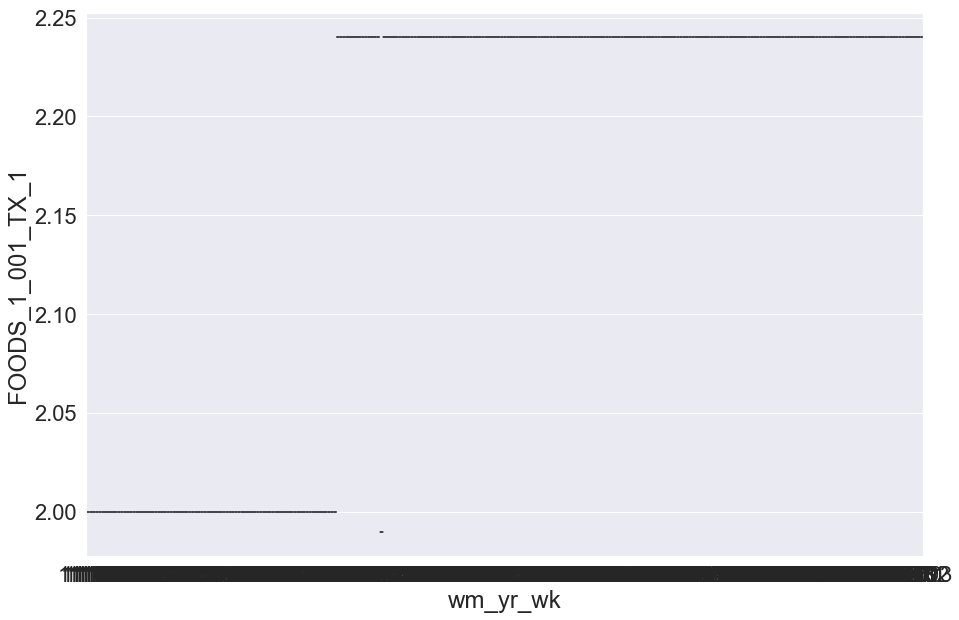

In [58]:
plt.figure(figsize=(15,10))
sns.set(font_scale = 2)
ax = sns.boxplot(x="wm_yr_wk", y="FOODS_1_001_TX_1", data=df1_r)

In [59]:
#Ok there is price increase after 2012, what about other item and state

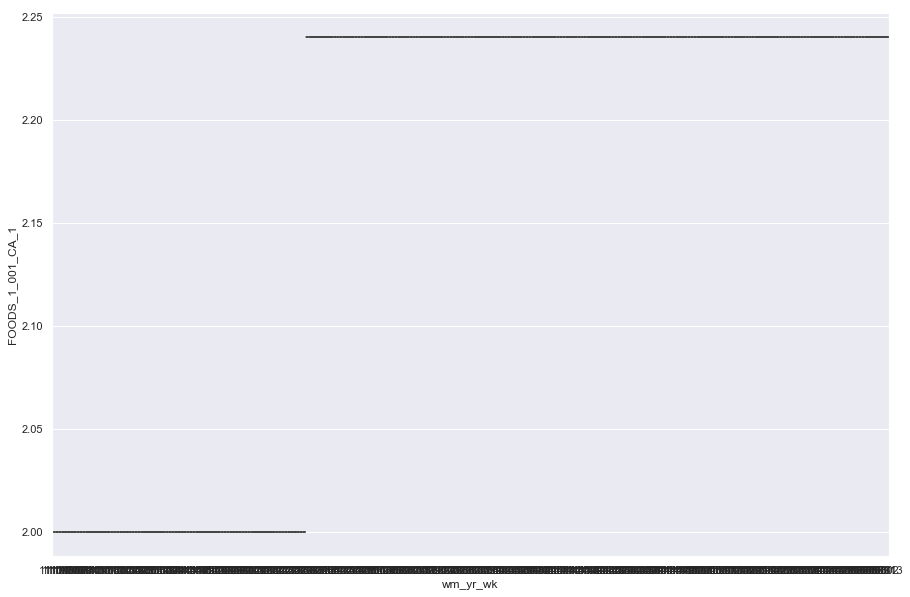

In [64]:
plt.figure(figsize=(15,10))
sns.set(font_scale = 1)
ax = sns.boxplot(x="wm_yr_wk", y="FOODS_1_001_CA_1", data=df1)

In [ ]:
plt.figure(figsize=(15,10))
sns.set(font_scale = 1)
ax = sns.boxplot(x="year", y="FOODS_1_001_CA_1", data=df1)

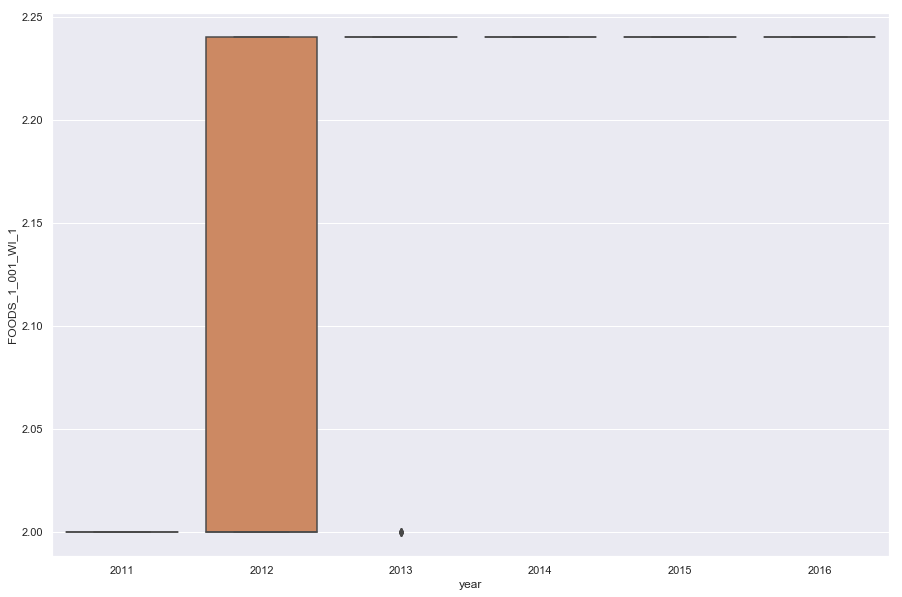

In [63]:
plt.figure(figsize=(15,10))
sns.set(font_scale = 1)
ax = sns.boxplot(x="year", y="FOODS_1_001_WI_1", data=df1)

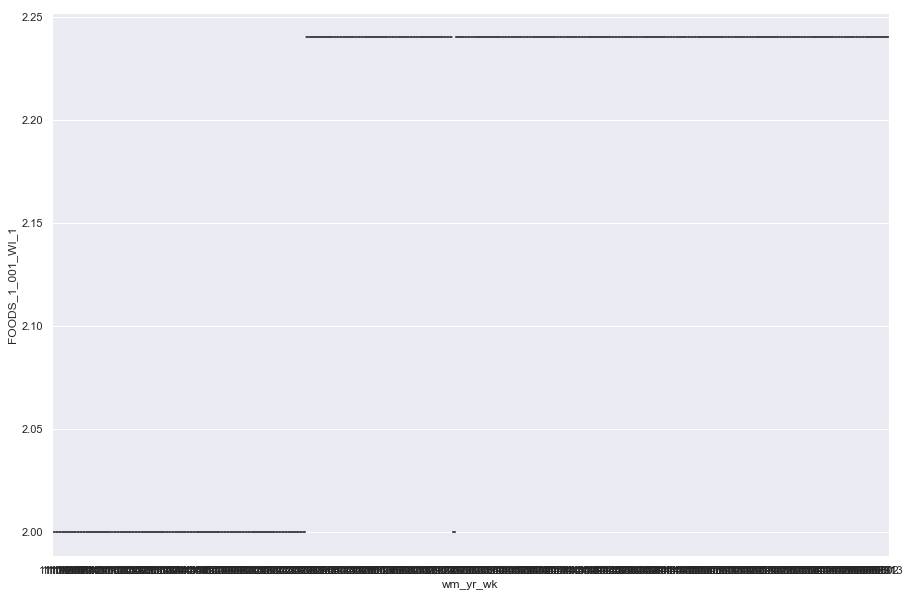

In [65]:
plt.figure(figsize=(15,10))
sns.set(font_scale = 1)
ax = sns.boxplot(x="wm_yr_wk", y="FOODS_1_001_WI_1", data=df1)

## 02.02. Sell price change of items in diff state : HOUSEHOLD_2_516_WI_1

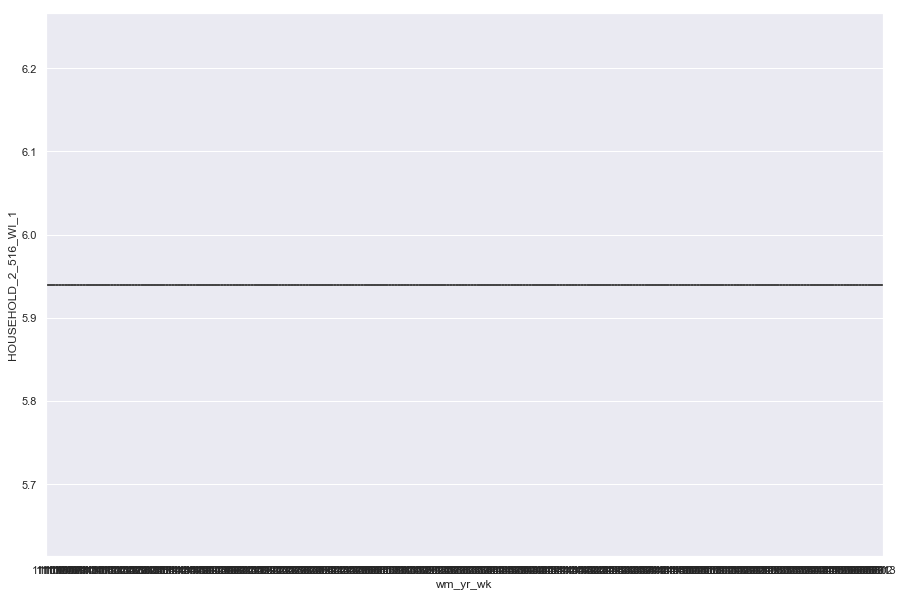

In [66]:
plt.figure(figsize=(15,10))
sns.set(font_scale = 1)
ax = sns.boxplot(x="wm_yr_wk", y="HOUSEHOLD_2_516_WI_1", data=df1)

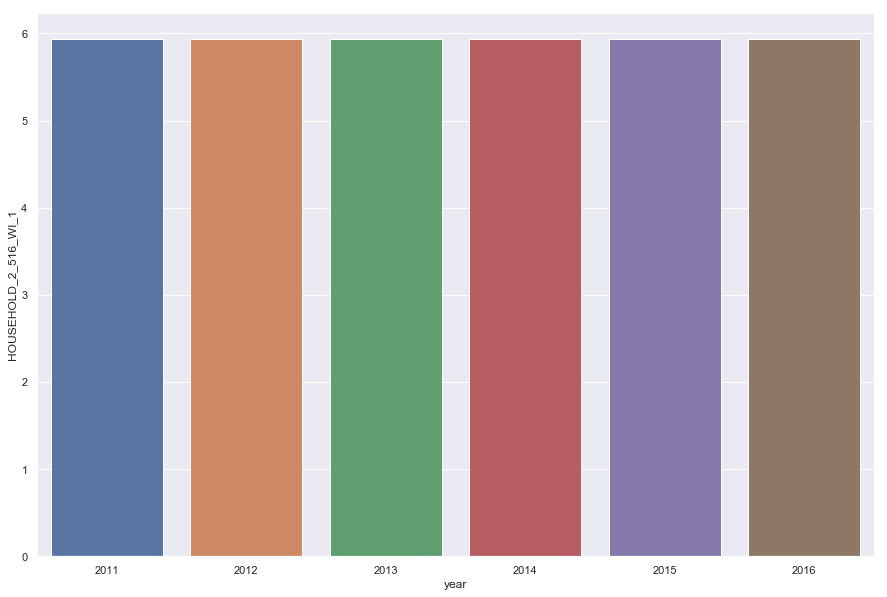

In [69]:
plt.figure(figsize=(15,10))
sns.barplot(x=df1.year,y=df1.HOUSEHOLD_2_516_WI_1,data=df1)

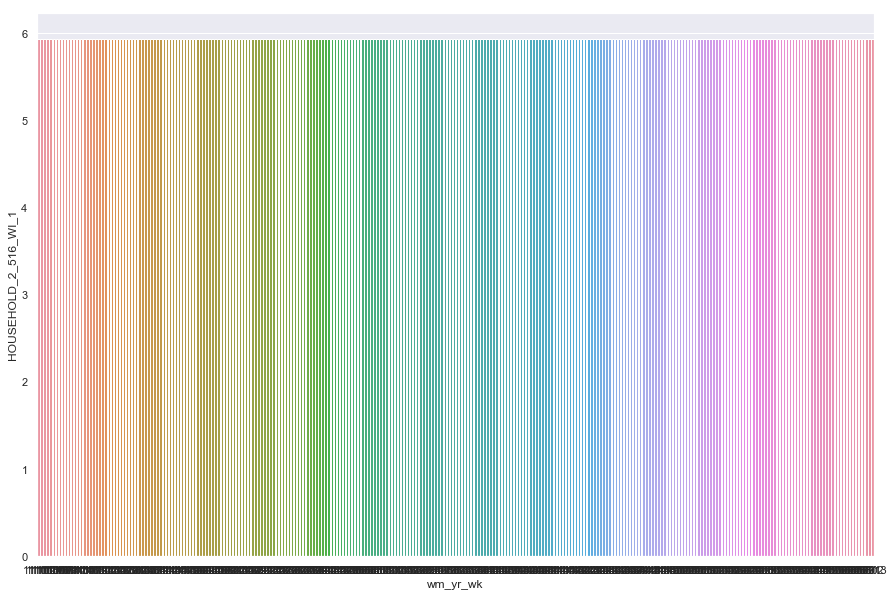

In [71]:
plt.figure(figsize=(15,10))
sns.barplot(x=df1.wm_yr_wk,y=df1.HOUSEHOLD_2_516_WI_1,data=df1)